# Script To Generate Values for Table 1

#### See Max Proton Energy Figure Notebook for more comments in fitting code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
# Truncate array when max proton energy goes down by more than 3% from the last file 
thresholdE = .001 # Starting threshold for acceleration

def cut_array(array,threshold):
    StartFit = array[:,1]>thresholdE
    Dropped = False
    for k in range(len(StartFit)):
        if (StartFit[k]==True and Dropped==False):
            if (array[k,1] <array[k-1,1]*.97): #If drop is more than 3% stop
                StartFit[k]=False 
                Dropped=True        
        else:
               StartFit[k]=False  
    return StartFit

Comparison time: 500 fs
I 	 1D/3D 		 2DS/3D 	 2DP/3D
1e17	2.71    	1.12    	1.14
1e17.5	1.59    	1.29    	1.30
1e18	1.77    	1.30    	1.26
1e18.5	2.31    	1.24    	1.28
1e19	2.41    	1.48    	1.30
1e19.5	3.03    	1.33    	1.54
1e20	(3.60)    	(2.15)    	1.56
1e20.5	[(4.69)]	[(1.43)]	[(2.35)]
1e21	[(3.29)]	[(1.39)]	[(1.97)]


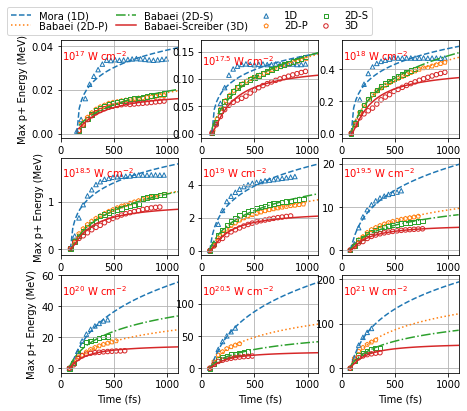

In [3]:
# Save step 30 = 300 fs, 50 = 500 fs
saveTime = 50 #30


fig = plt.figure()
Intensities = np.array (['1e17', '1e17.5','1e18','1e18.5', '1e19','1e19.5','1e20','1e20.5', '1e21'])
labels = np.array ([r'$10^{17}$',r'$10^{17.5}$', r'$10^{18}$',r'$10^{18.5}$', r'$10^{19}$',r'$10^{19.5}$',r'$10^{20}$',r'$10^{20.5}$', r'$10^{21}$'])
############

#Store values to take ratio later
max1D = np.zeros(len(Intensities)) 
max2DS = np.zeros(len(Intensities))
max2DP = np.zeros(len(Intensities))
max3D =np.zeros(len(Intensities))

simData3D = np.empty(len(Intensities), dtype=bool)
simData1D = np.empty(len(Intensities), dtype=bool)
simData2DS = np.empty(len(Intensities), dtype=bool)
simData2DP = np.empty(len(Intensities), dtype=bool)


XEnd = [1100,1100,1100,1100,1100,1100,1100,1100,1100]
YEnd = [0.6, 5, 50,125]
skip = 4
markersize = 20
for i in range (len(Intensities)):
    ax1 = plt.subplot(3,3,i+1)
   
    #1D
    maxProton1D = np.loadtxt('./1D/2/' +Intensities[i] +'/ProtonMaxE.dat')
    StartFit1D = cut_array(maxProton1D, thresholdE)    
    
    maxProton1D[StartFit1D, 0][0]
    oneD_offset =  maxProton1D[StartFit1D, 0][0]
    maxProton1D[:,0] = maxProton1D[:,0] - oneD_offset
    plt.scatter(maxProton1D[StartFit1D,0][::skip]+oneD_offset,maxProton1D[StartFit1D,1][::skip], label = '1D', s = markersize, marker='^',facecolor="None",edgecolors='C0' )
    #curve fit
    def guess (t,a,b):
        return a*(np.log(b*t+np.sqrt((b*t)**2+1)))**2 
    params, covs = curve_fit(guess,maxProton1D[StartFit1D,0],maxProton1D[StartFit1D,1])
    fit_a = params [0]
    fit_b = params [1]
    x_plot = np.linspace(0,1100)
    fit_E = guess(x_plot,fit_a,fit_b)
    plt.plot(x_plot +oneD_offset,(fit_E), color = "C0", linestyle = '--', label = 'Mora (1D)')
    

      #############################
    Time = maxProton1D[saveTime,0]

    simData1D[i] = (StartFit1D[saveTime])
    if simData1D[i]:
        max1D[i] = maxProton1D[saveTime,1]
    else:
        max1D[i] =  guess(Time+oneD_offset,fit_a,fit_b)
    #############################      

    plt.text(10, fit_E[-1]*.825, labels[i] + r" W cm$^{-2}$",color='red')
    #plt.text(10, YEnd[i]*.875, labels[i] + r" W cm$^{-2}$",color='red')

    #2DP
    maxProton2DP = np.loadtxt('./2DP/2/' +Intensities[i] +'/ProtonMaxE.dat')
    StartFit2DP = cut_array(maxProton2DP, thresholdE)
    
    #fitting
    y2DP = maxProton2DP[StartFit2DP,1]
    x2DP = np.log(maxProton2DP[StartFit2DP,0])
    gradient, intercept2DP, r_value, p_value, slope_std_error = stats.linregress(x2DP, y2DP)
    x_plot2DP = np.linspace(maxProton2DP[StartFit2DP,0][0],1500)
    predict_y2DP = gradient * (np.log(x_plot2DP)) + intercept2DP
    shiftedtime2DP = maxProton2DP[StartFit2DP,0] - 100
    plt.scatter(maxProton2DP[StartFit2DP,0][::skip],maxProton2DP[StartFit2DP,1][::skip], label = '2D-P', s = markersize, marker='p',facecolor="None",edgecolors='C1')
    plt.plot(x_plot2DP,predict_y2DP,color='C1', linestyle = 'dotted', label = 'Babaei (2D-P)')
    
      #############################
    Time = maxProton2DP[saveTime,0]
    simData2DP[i] = (StartFit2DP[saveTime])
    if simData2DP[i]:
        max2DP[i] = maxProton2DP[saveTime,1]
    else:
        max2DP[i] =  gradient * (np.log(Time)) + intercept2DP
    #############################  
    
    #2DS
    maxProton2DS = np.loadtxt('./2DS/2/' +Intensities[i] +'/ProtonMaxE.dat')
    StartFit2DS    = cut_array(maxProton2DS, thresholdE)   
                   
    #fitting
    y2DS = maxProton2DS[StartFit2DS,1]
    x2DS = np.log(maxProton2DS[StartFit2DS,0])
    gradient, intercept2DS, r_value, p_value, slope_std_error = stats.linregress(x2DS, y2DS)
    x_plot2DS = np.linspace(maxProton2DS[StartFit2DS,0][0],1100)
    predict_y2DS = gradient * (np.log(x_plot2DS)) + intercept2DS
    shiftedtime2DS = maxProton2DS[StartFit2DS,0] - 100
    plt.scatter(maxProton2DS[StartFit2DS,0][::skip],maxProton2DS[StartFit2DS,1][::skip], label = '2D-S',s = markersize, marker='s',facecolor="None",edgecolors='C2')
    plt.plot(x_plot2DS,predict_y2DS,color='C2', linestyle = 'dashdot', label = 'Babaei (2D-S)')
    

      #############################
    Time = maxProton2DS[saveTime,0]
    simData2DS[i] = (StartFit2DS[saveTime])
    if simData2DS[i]:
        max2DS[i] = maxProton2DS[saveTime,1]
    else:
        max2DS[i] =  gradient * (np.log(Time)) + intercept2DS
    #############################  
    
    #3D
    maxProton = np.loadtxt('./3D/2/' + Intensities[i] +'/ProtonMaxE.dat')
    
    StartFit = cut_array(maxProton, thresholdE)
    y = np.sqrt(maxProton[StartFit,1])
    #print(maxProton[StartFit,0])
    x = 1/(maxProton[StartFit,0])
    gradient, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
    result = stats.linregress(x, y)
    E_inf = intercept**2
    x_plot = np.linspace(maxProton[StartFit,0][0],1100)
    predict_y = gradient * (1/x_plot) + intercept
    plt.scatter( maxProton[StartFit,0][::skip],maxProton[StartFit,1][::skip], label = '3D', s = markersize,facecolor="None",edgecolors='C3' )
    plt.plot(x_plot,predict_y**2,color='C3', linestyle = 'solid', label='Babaei-Screiber (3D)')
    
    #############################
    Time = maxProton[saveTime,0]
    simData3D[i] = (StartFit[saveTime])
    if simData3D[i]:
        max3D[i] = maxProton[saveTime,1]
    else:
        max3D[i] =  (gradient * (1/Time) + intercept)**2
    #############################
    #plt.xlim(0,1100)
    plt.xlim(0,XEnd[i])
    plt.grid()
    if i > 1:
        plt.xlabel('Time (fs)')
    if i % 3==0:
        plt.ylabel('Max p+ Energy (MeV)')
    fig.set_size_inches(6.5,6)
    if i == 0:
        #lgnd=plt.legend( loc = 'center', ncol = 4 ,labelspacing=1,handlelength=0.2, bbox_to_anchor=(1, 1.1))
        lgnd=plt.legend( loc = 'center', ncol = 4 ,labelspacing=0, bbox_to_anchor=(1.1, 1.2), columnspacing=0.8) #,handlelength=0.2
        
plt.subplots_adjust(bottom=0.11, right=.95, top=.88,left=0.1,wspace=0.2)


##################
#Testing
# print(simData1D)
# print(max1D)
# print(simData2DP)
# print(max2DP)
# print(simData2DS)
# print(max2DS)
# print(simData3D)
# print(max3D)


print('Comparison time: ' + '{0:.0f}'.format(Time) +" fs")
print("I \t 1D/3D \t\t 2DS/3D \t 2DP/3D")
for i in range (len(Intensities)):
    Line = Intensities[i] + "\t" 
    value1D = '{0:.2f}'.format(max1D[i]/max3D[i])
    if not (simData1D[i]):
        value1D = '(' + value1D + ')'
    if not (simData3D[i]):
         value1D = '[' + value1D + ']'
    else:
        value1D = value1D + "    "
            
    value2DS = '{0:.2f}'.format(max2DS[i]/max3D[i])
    if not (simData2DS[i]):
        value2DS = '(' + value2DS + ')'  
    if not (simData3D[i]):
         value2DS = '[' + value2DS + ']'
    else:
        value2DS = value2DS + "    "
        
    value2DP = '{0:.2f}'.format(max2DP[i]/max3D[i])
    if not (simData2DP[i]):
        value2DP = '(' + value2DP + ')' 
    if not (simData3D[i]):
         value2DP = '[' + value2DP + ']'

            
            
    print( Line  + value1D + "\t"+ value2DS+ "\t"+ value2DP)
    

In [4]:
#Comparison time: 300 fs
#I 	 1D/3D 		 2DS/3D 	 2DP/3D
#1e17	2.96    	1.05    	1.15
#1e17.5	2.06    	1.35    	1.33
#1e18	2.55    	1.54    	1.51
#1e18.5	3.02    	1.28    	1.43
#1e19	2.85    	1.54    	1.32
#1e19.5	3.30    	1.32    	1.49
#1e20	2.64    	1.82    	1.28
#1e20.5	3.68    	1.35    	2.15
#1e21	2.69    	1.31    	1.84